In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot,init_notebook_mode
import matplotlib

In [2]:
calendar = pd.read_csv('/Users/john.tung/Downloads/Airbnb/calendar.csv')
print(calendar.date.nunique() , '天的資料及' , calendar.listing_id.nunique() ,'個不同的清單在我們的 calendar 中')
print('資料起始日：', calendar.date.min(),'資料最後日：' , calendar.date.max())
calendar.head()

366 天的資料及 10120 個不同的清單在我們的 calendar 中
資料起始日： 2019-09-30 資料最後日： 2020-09-29


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,68396,2019-09-30,f,"$1,552.00","$1,552.00",7.0,365.0
1,68396,2019-10-01,f,"$1,552.00","$1,552.00",7.0,365.0
2,68396,2019-10-02,f,"$1,552.00","$1,552.00",7.0,365.0
3,68396,2019-10-03,f,"$1,552.00","$1,552.00",7.0,365.0
4,68396,2019-10-04,f,"$1,552.00","$1,552.00",7.0,365.0


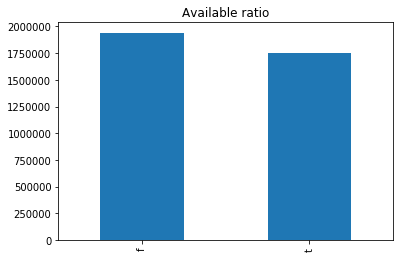

In [4]:
calendar.available.value_counts().plot(kind = 'bar' , title = 'Available ratio')

/Users/john.tung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, '%Busy')

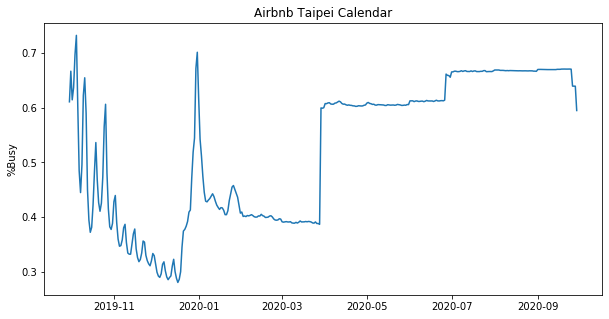

In [5]:
new_calendar = calendar[['date' , 'available']]
#available : False，代表說是旺季（比較熱門）
new_calendar['busy'] = new_calendar.available.map(lambda x:0 if x == 't' else 1)
new_calendar = new_calendar.groupby('date')['busy'].mean().reset_index()

new_calendar['date'] = pd.to_datetime(new_calendar['date'])

plt.figure(figsize = (10 , 5))
plt.plot(new_calendar['date'] , new_calendar['busy'])
plt.title('Airbnb Taipei Calendar')
plt.ylabel('%Busy')

Text(0, 0.5, 'Month')

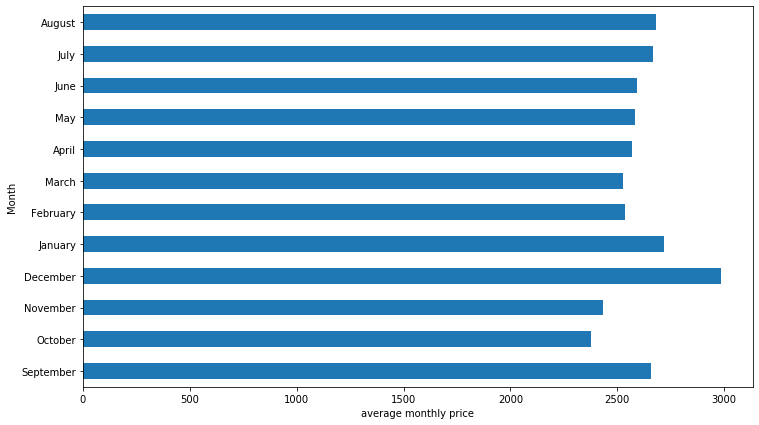

In [6]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].str.replace(',','').str.replace('$' , '').astype(float)

mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B') , sort = False)['price'].mean()

mean_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('average monthly price')
plt.ylabel('Month')

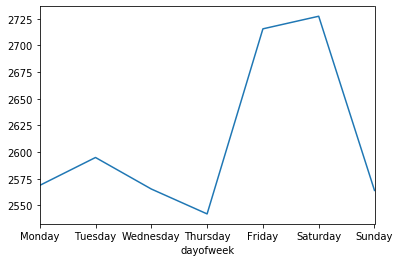

In [8]:
calendar['dayofweek'] = calendar.date.dt.weekday_name
cats = calendar.dayofweek.unique().tolist()
price_week = calendar.groupby('dayofweek')['price'].mean().reindex(cats)
price_week.plot()

In [10]:
listing = pd.read_csv('/Users/john.tung/Downloads/Airbnb/listings.csv')
print('We have' , listing.id.nunique() , 'listings in the listing data')
listing.info()
listing.head()

We have 10120 listings in the listing data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10120 entries, 0 to 10119
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 8.2+ MB


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,68396,https://www.airbnb.com/rooms/68396,20190930183300,2019-09-30,Zhongxiao Dunhua Studio C near MRT,Prime location! Right in the center of Taipei'...,Located at Zhongxiao East Road of Daan distric...,Prime location! Right in the center of Taipei'...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,11,11,0,0,0.03
1,68398,https://www.airbnb.com/rooms/68398,20190930183300,2019-09-30,Tonghua Vacation Studio C,Convenient location; close to MRT and walking ...,Private Studio apartment with ensuite bathroom...,Convenient location; close to MRT and walking ...,none,Locates in a quiet neighborhood of Tonghua Str...,...,f,f,strict_14_with_grace_period,f,f,11,11,0,0,0.08
2,74641,https://www.airbnb.com/rooms/74641,20190930183300,2019-10-01,黑白雙人房@南京復興站｡小巨蛋斜對面｡溫泉式浴缸｡,"私人衛浴大套房,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨和IKEA...","你的套房裡有清爽安靜的空間,舒服的衛浴設備,無線網路Wi-fi,旅行需要洗衣服也沒問題,有洗...","私人衛浴大套房,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨和IKEA...",none,This area is what we called Business & Residen...,...,f,f,strict_14_with_grace_period,f,f,4,0,4,0,0.50
3,74643,https://www.airbnb.com/rooms/74643,20190930183300,2019-10-01,小巨蛋｡南京復興站溫馨套房,"小巨蛋對面,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨;私人衛浴套房...","歡迎來台北,我們的小提琴工作室就在一旁,如果有興趣,我們很樂意和客人互動! 你的套房裡有清爽...","小巨蛋對面,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨;私人衛浴套房...",none,"微風南京,台北小巨蛋｡ 南京復興捷運站,兄弟飯店,文華飯店｡",...,f,f,strict_14_with_grace_period,f,f,4,0,4,0,0.49
4,178036,https://www.airbnb.com/rooms/178036,20190930183300,2019-09-30,單人床位 Single bunk bed [mixed dorm for 4pax],Hello from Taipei :) We are located at Zhongz...,"This is a single bunk bed in Mixed dorm for 4,...",Hello from Taipei :) We are located at Zhongz...,none,Local food within 5 mins walk 6 mins walk from...,...,t,f,moderate,f,f,8,0,1,0,0.67


/Users/john.tung/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 33836 missing from current font.

/Users/john.tung/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 33775 missing from current font.

/Users/john.tung/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 21312 missing from current font.

/Users/john.tung/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 22823 missing from current font.

/Users/john.tung/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 23433 missing from current font.

/Users/john.tung/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 20013 missing from current font.

/Users/john.tung/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.p

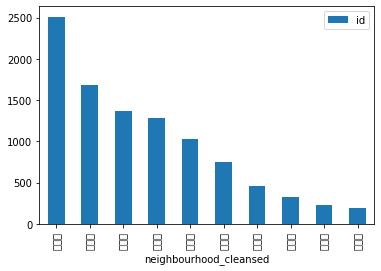

In [21]:
grouped_df = listing.groupby('neighbourhood_cleansed').count()[['id']].sort_values('id' , ascending = False).head(10)
grouped_df.plot(kind = 'bar')

/Users/john.tung/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 25151 missing from current font.

/Users/john.tung/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 23458 missing from current font.

/Users/john.tung/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 20497 missing from current font.

/Users/john.tung/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 32102 missing from current font.

/Users/john.tung/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 30340 missing from current font.

/Users/john.tung/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 20998 missing from current font.

/Users/john.tung/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.p

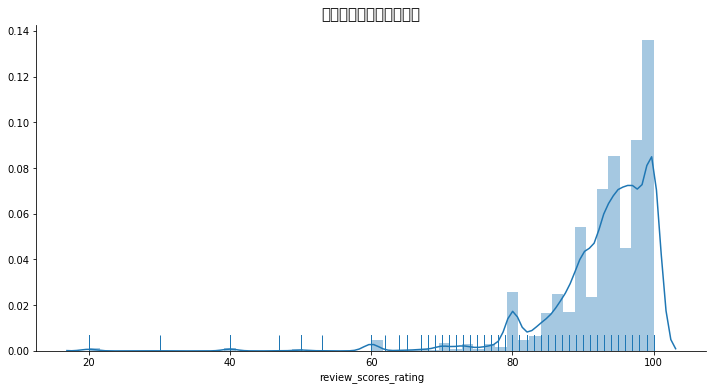

In [22]:
plt.figure(figsize = (12 , 6))
plt.title('房客們給的分數都蠻甜的' , fontsize = 15)
sns.distplot(listing.review_scores_rating.dropna() , rug = True)
sns.despine()